In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lorenz(t, x, y, z, sigma, rho, beta):
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x*y - beta*z
    return dx_dt, dy_dt, dz_dt

In [3]:
def euler(t, x, y, z, dt, sigma, rho, beta):
    f_x, f_y, f_z = lorenz(t, x, y, z, sigma, rho, beta)

    x += dt * f_x
    y += dt * f_y
    z += dt * f_z

    return x, y, z

In [4]:
# test Euler method
#initial conditions
x0, y0, z0 = 0,1,0.8
sigma, rho, beta = 10, 28, 8/3
t, dt = 0, 0.01
#integration loop
x_list = []
y_list = []
z_list = []
for i in range(10000):
    x, y, z = euler(t, x0, y0, z0, dt, sigma, rho, beta)
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)
    x0, y0, z0 = x, y, z
    t += dt

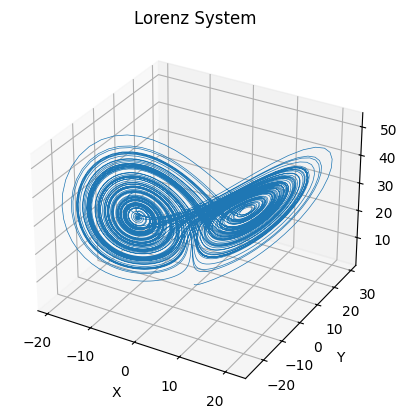

In [5]:
#plotting
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x_list, y_list, z_list, lw=0.5)
ax.set_title("Lorenz System")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


In [6]:
def runge_kutta(t, x, y, z, dt, sigma, rho, beta):
    f1_x, f1_y, f1_z = lorenz(t, x, y, z, sigma, rho, beta)

    f2_x, f2_y, f2_z = lorenz(t + 0.5*dt, x + 0.5*dt * f1_x, y + 0.5*dt * f1_y, z + 0.5*dt * f1_z, sigma, rho, beta)

    f3_x, f3_y, f3_z = lorenz(t + 0.5*dt, x + 0.5*dt * f2_x, y + 0.5*dt * f2_y, z + 0.5*dt * f2_z, sigma, rho, beta)

    f4_x, f4_y, f4_z = lorenz(t + dt, x + dt * f3_x, y + dt * f3_y, z + dt * f3_z, sigma, rho, beta)

    x += (dt * f1_x + 2*dt * f2_x + 2*dt * f3_x + dt * f4_x) / 6.0
    y += (dt * f1_y + 2*dt * f2_y + 2*dt * f3_y + dt * f4_y) / 6.0
    z += (dt * f1_z + 2*dt * f2_z + 2*dt * f3_z + dt * f4_z) / 6.0

    return x, y, z

In [7]:
# test Runge Kutta Rk4 method
#initial conditions
x0, y0, z0 = 1, 1, 1
sigma, rho, beta = 10, 28, 8/3
t, dt = 0, 0.01
#integration loop
x_list = []
y_list = []
z_list = []
for i in range(10000):
    x, y, z = runge_kutta(t, x0, y0, z0, dt, sigma, rho, beta)
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)
    x0, y0, z0 = x, y, z
    t += dt

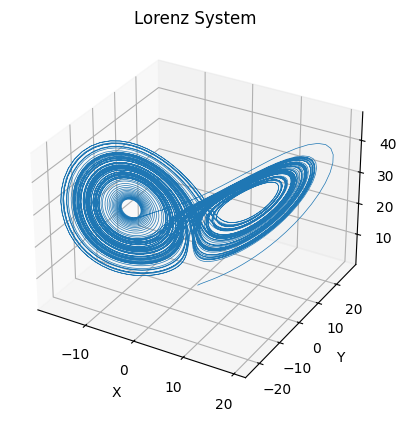

In [8]:
#plotting
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x_list, y_list, z_list, lw=0.5)
ax.set_title("Lorenz System")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()